# User Referral Program


## Goal

Almost all sites have a user referral program where you can invite new users to try a given product. Typically, after the new user completes a transaction, you get rewarded with a certain amount of money or credit to be used on the site.

The goal of this challenge is to analyze the data from a referral program and draw conclusions about its effectiveness.


## Challenge Description


Company XYZ has started a new referral program on Oct, 31. Each user who refers a new user will get 10$ in credit when the new user buys something.

The program has been running for almost a month and the Growth Product Manager wants to know if it’s been successful. She is very excited because, since the referral program started, the company saw a spike in number of users and wants you to be able to give her some data she can show to her boss.

* Can you estimate the impact the program had on the site?

* Based on the data, what would you suggest to do as a next step?

* The referral program wasn’t really tested in a rigorous way. It simply started on a given day for all users and you are drawing conclusions by looking at the data before and after the test started. What kinds of risks this approach presents? Can you think of a better way to test the program and measure its impact?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

11_User_Referral_Program.ipynb  referral.csv


In [3]:
df = pd.read_csv('referral.csv')
df.head(10)

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH
5,10,2015-10-03,DE,36,0,CVZCQLPXZCFUV
6,17,2015-10-03,UK,25,0,RCHOYRWHPOEVE
7,19,2015-10-03,UK,69,0,ICGUPKJIJFZUK
8,19,2015-10-03,US,17,0,ICGUPKJIJFZUK
9,19,2015-10-03,FR,29,0,ICGUPKJIJFZUK


* user_id : the id of the user
* date : date of the purchase
- country : user country based on the ip address
- money_spent : how much the item bought costs (USD)
- is_referral : whether the user came from the referral program (1) or not (0)
- device_id : Id of the device used to make the purchase

In [4]:
df.shape

(97341, 6)

In [5]:
df.isnull().sum()

user_id        0
date           0
country        0
money_spent    0
is_referral    0
device_id      0
dtype: int64

In [6]:
df.dtypes

user_id         int64
date           object
country        object
money_spent     int64
is_referral     int64
device_id      object
dtype: object

In [7]:
df.date = pd.to_datetime(df.date)

In [8]:
df.dtypes

user_id                 int64
date           datetime64[ns]
country                object
money_spent             int64
is_referral             int64
device_id              object
dtype: object

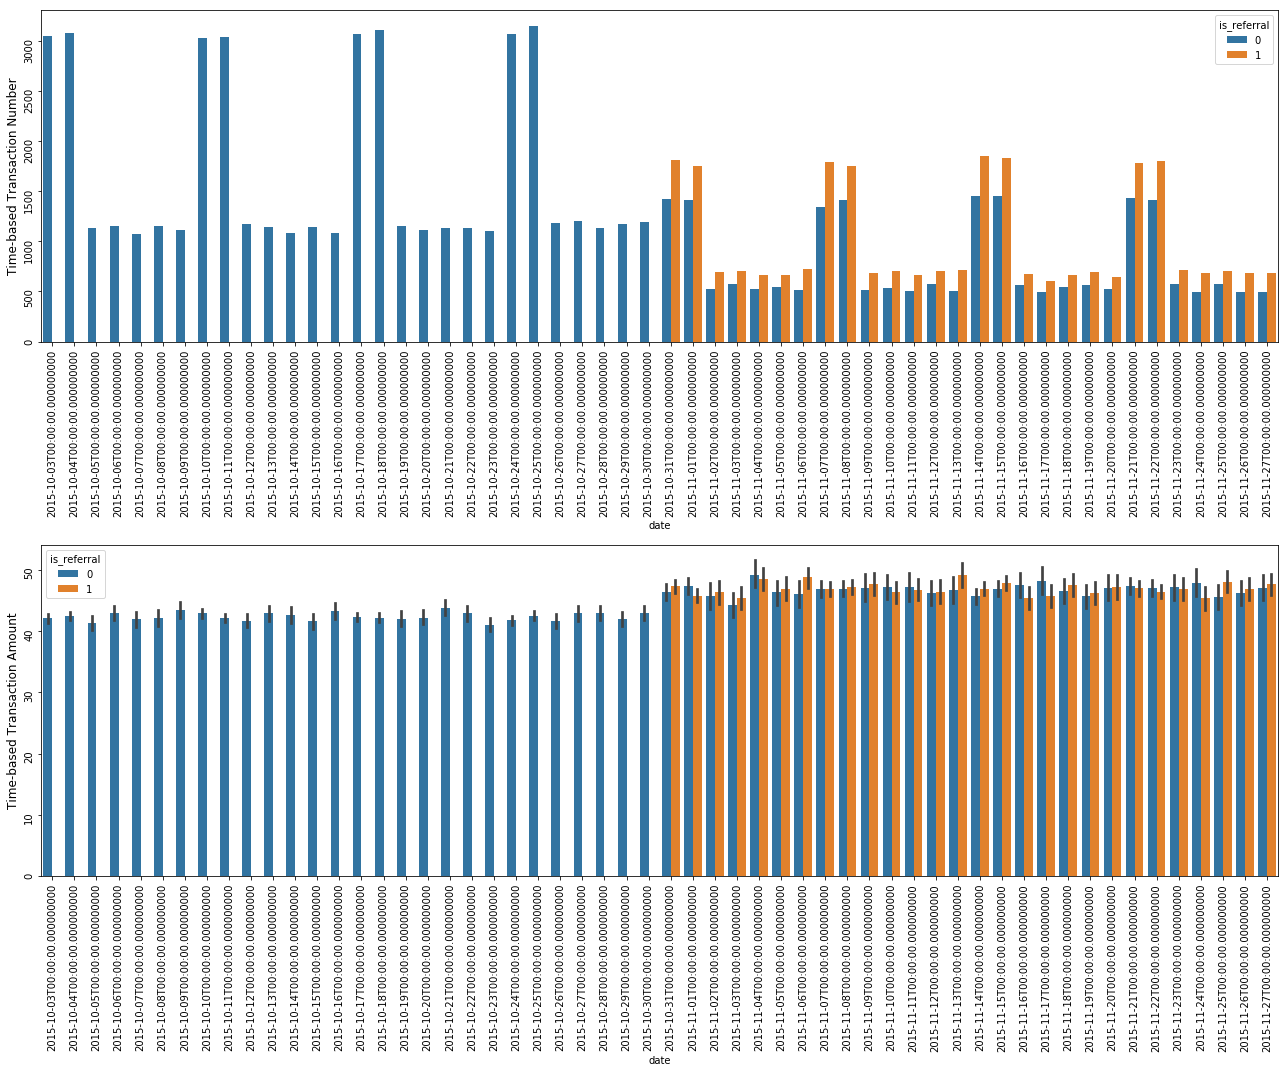

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
sns.countplot(x='date', hue='is_referral', data=df, ax=ax[0])
ax[0].set_ylabel('Time-based Transaction Number', fontsize=12)
ax[0].tick_params(labelrotation=90)

sns.barplot(x='date', y='money_spent', hue='is_referral', data=df, ax=ax[1])
ax[1].set_ylabel('Time-based Transaction Amount', fontsize=12)
ax[1].tick_params(labelrotation=90)
plt.tight_layout()
plt.show()

In [10]:
# split the data to after and before 2015-10-31.

df2 = df[df.date >='2015-10-31']

In [11]:
df2.is_referral.value_counts()

1    28017
0    21983
Name: is_referral, dtype: int64

In [12]:
df_referral1 = df2.groupby('is_referral')['money_spent'].sum().reset_index()
df_referral2 = df2.groupby('is_referral')['money_spent'].size().reset_index(name='counts')
df_referral1 = pd.merge(df_referral1, df_referral2, how = 'left', on = 'is_referral')
df_referral1['average_spend'] = df_referral1.money_spent/df_referral1.counts
df_referral1

,is_referral,money_spent,counts,average_spend
0,0,1028216,21983,46.773234
1,1,1315787,28017,46.963879


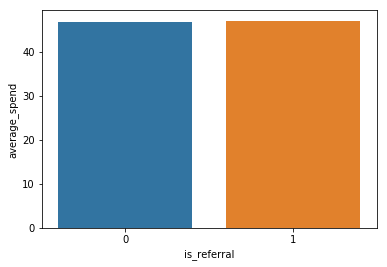

In [13]:
fig, ax = plt.subplots()
sns.barplot(x = df_referral1.is_referral, y = df_referral1.average_spend, ax=ax)

In [14]:
# groupby users

df3 = df2.groupby(['user_id','is_referral','country'])['money_spent'].sum().reset_index()
print(df3.is_referral.value_counts())
print(df3.shape)
df3.head(10)

1    24856
0    19768
Name: is_referral, dtype: int64
(44624, 4)


,user_id,is_referral,country,money_spent
0,1,0,DE,53
1,1,0,ES,26
2,1,0,MX,46
3,2,0,ES,48
4,2,0,IT,46
5,3,0,FR,49
6,4,0,FR,45
7,5,0,IT,38
8,6,0,CH,17
9,6,0,US,48


In [15]:
df_referral2 = df3.groupby('is_referral')['money_spent'].sum().reset_index()
df_referral3 = df3.groupby('is_referral')['money_spent'].size().reset_index(name='counts')
df_referral2 = pd.merge(df_referral2, df_referral3, how = 'left', on = 'is_referral')
df_referral2['average_spend'] = df_referral2.money_spent/df_referral2.counts
df_referral2

,is_referral,money_spent,counts,average_spend
0,0,1028216,19768,52.014164
1,1,1315787,24856,52.936394


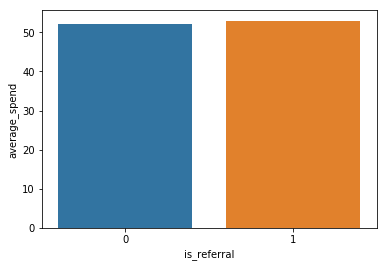

In [16]:
# average spend grouped by people/id

fig, ax = plt.subplots()
sns.barplot(x = df_referral2.is_referral, y = df_referral2.average_spend, ax=ax)

In [17]:
df_country1 = df2.groupby(['country','is_referral'])['money_spent'].mean()
df_country1

country  is_referral
CA       0              49.801925
         1              48.820032
CH       0              60.582915
         1              59.544803
DE       0              48.577171
         1              49.072149
ES       0              44.389262
         1              44.634879
FR       0              44.591028
         1              44.608045
IT       0              44.991786
         1              44.511167
MX       0              42.818802
         1              42.939346
UK       0              48.443367
         1              49.630776
US       0              49.517124
         1              49.742201
Name: money_spent, dtype: float64

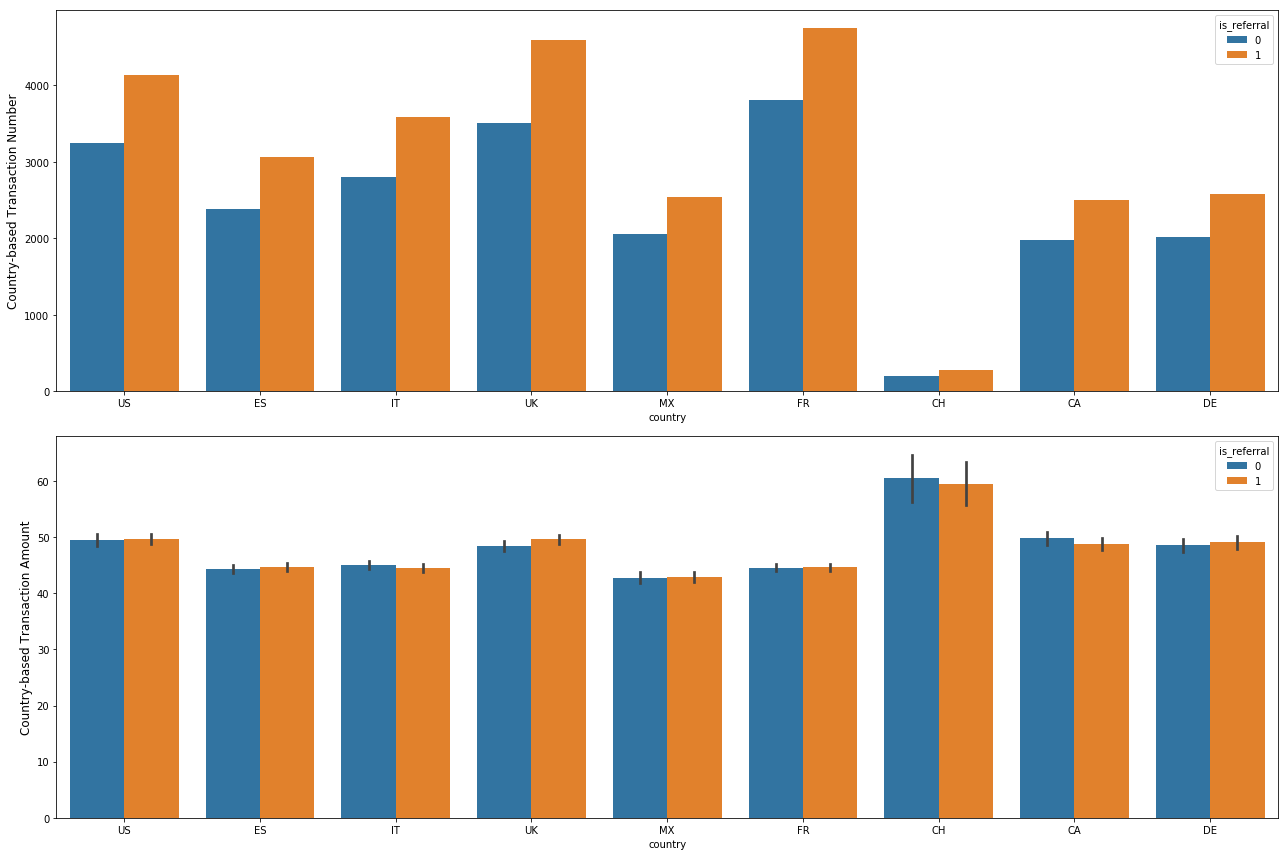

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='country', hue='is_referral', data=df2, ax=ax[0])
ax[0].set_ylabel('Country-based Transaction Number', fontsize=12)

sns.barplot(x='country', y='money_spent', hue='is_referral', data=df2, ax=ax[1])
ax[1].set_ylabel('Country-based Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

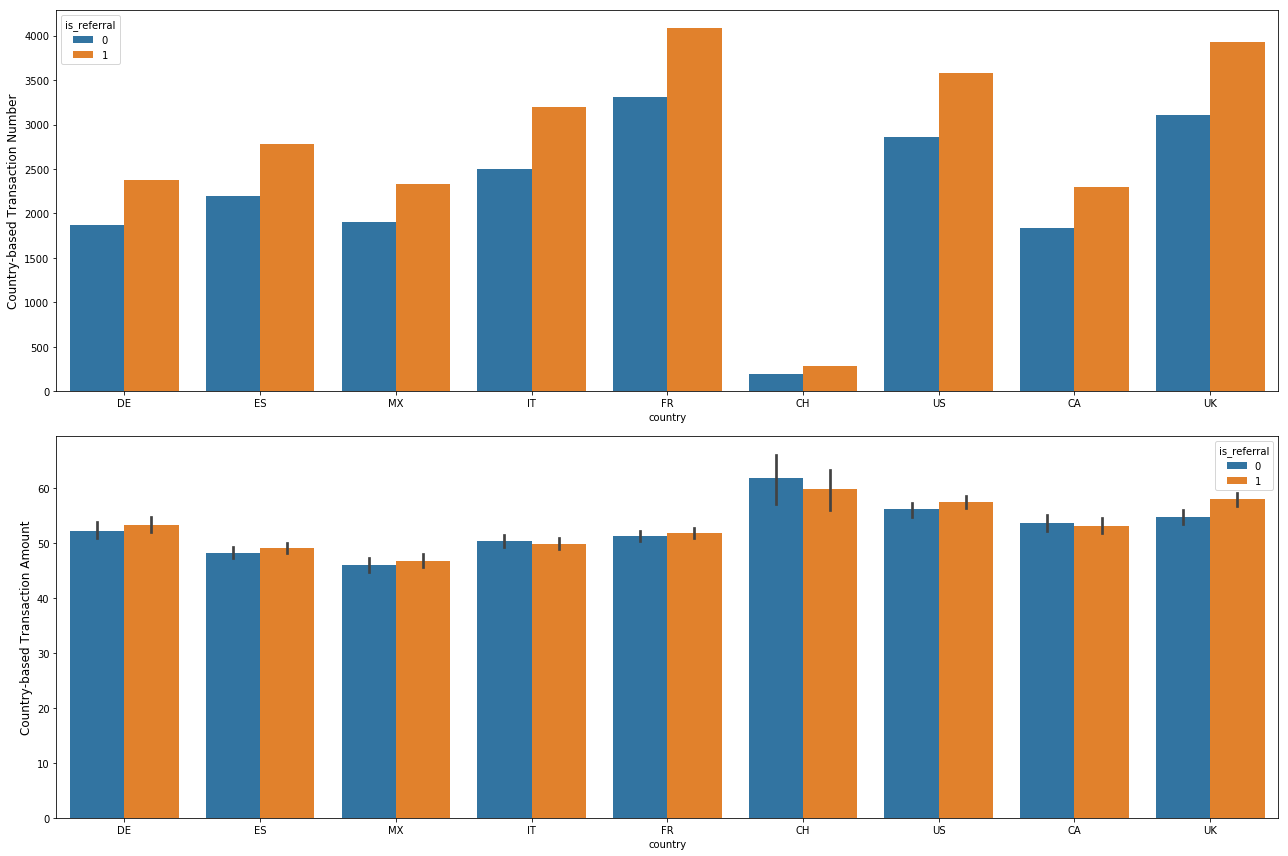

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='country', hue='is_referral', data=df3, ax=ax[0])
ax[0].set_ylabel('Country-based Transaction Number', fontsize=12)

sns.barplot(x='country', y='money_spent', hue='is_referral', data=df3, ax=ax[1])
ax[1].set_ylabel('Country-based Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

## Question I

Can you estimate the impact the program had on the site?

Looks like referral is not succesful in China and Canada. Need t-test to furture explore the data.

In [20]:
from scipy import stats

no_referral_list = []
referral_list = []
pvalue_list = []

countries = list(df2.country.unique())

for country in countries:
    test = df2[(df2.country == country) & (df2.is_referral==1)].money_spent
    control = df2[(df2.country == country) & (df2.is_referral==0)].money_spent

    stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
    no_referral_list.append(control.mean())
    referral_list.append(test.mean())
    pvalue_list.append(pvalue)
    print(country,control.mean(),test.mean(),pvalue)

US 49.517124344338164 49.742200725513904 0.7260621770594857
ES 44.38926174496644 44.634879163945136 0.6540958893739636
IT 44.99178571428571 44.511166945840316 0.3480548303676261
UK 48.44336661911555 49.63077593722755 0.051225560377017344
MX 42.81880175353142 42.93934619929106 0.8612375762745654
FR 44.59102833158447 44.60804549283909 0.9689620482294875
CH 60.58291457286432 59.54480286738351 0.7213195769315084
CA 49.80192502532928 48.82003192338388 0.2307736165306686
DE 48.577171215880895 49.07214895267649 0.5416448892087824


In [21]:
pd.DataFrame({'country': countries,
              'no_referral': no_referral_list,
              'referral': referral_list,
              'p-value': pvalue_list})

,country,no_referral,referral,p-value
0,US,49.517124,49.742201,0.726062
1,ES,44.389262,44.634879,0.654096
2,IT,44.991786,44.511167,0.348055
3,UK,48.443367,49.630776,0.051226
4,MX,42.818802,42.939346,0.861238
5,FR,44.591028,44.608045,0.968962
6,CH,60.582915,59.544803,0.721320
7,CA,49.801925,48.820032,0.230774
8,DE,48.577171,49.072149,0.541645


Referral has impact in UK. I do not see significant difference in CH and CA due to p-values. Again, do user-id-based test.

In [22]:
from scipy import stats

no_referral_list = []
referral_list = []
pvalue_list = []

countries = list(df3.country.unique())

for country in countries:
    test = df3[(df3.country == country) & (df3.is_referral==1)].money_spent
    control = df3[(df3.country == country) & (df3.is_referral==0)].money_spent

    stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
    no_referral_list.append(control.mean())
    referral_list.append(test.mean())
    pvalue_list.append(pvalue)
    #print(country,control.mean(),test.mean(),pvalue)

In [23]:
pd.DataFrame({'country': countries,
              'no_referral': no_referral_list,
              'referral': referral_list,
              'p-value': pvalue_list})

,country,no_referral,referral,p-value
0,DE,52.287927,53.266526,0.314521
1,ES,48.255358,49.144912,0.204828
2,MX,46.072851,46.811078,0.379725
3,IT,50.410964,49.871442,0.448129
4,FR,51.353776,51.847980,0.463380
5,CH,61.825641,59.758993,0.493503
6,US,56.152904,57.421552,0.152512
7,CA,53.691425,53.192609,0.624948
8,UK,54.736944,57.955205,0.000144


Still UK. 

## Question II

Based on the data, what would you suggest to do as a next step?

Probably we need more data (longer time) for each country especially China (CH). And need to discuss randomization for A/B testing. 


## Question III

The referral program wasn’t really tested in a rigorous way. It simply started on a given day for all users and you are drawing conclusions by looking at the data before and after the test started. What kinds of risks this approach presents? Can you think of a better way to test the program and measure its impact?

In order to avoid risk of time changing, I only use the data after Oct 31 (for the same period). Still need:

- randomly split the **new** customers into two groups, and let only one group know the User Referral program.

- run the experiment some time, then perform the t-test to see whether some 'sale performance index' (e.g., daily spent, daily customers, daily transactions) have significant changes or not.

